# Homework 1

**Due Wednesday, September 5 by 2:00 PM**. Submit via handin as hwk1.

Some helpful setup code. Feel free to add whatever else you might need.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

## Question 1

Pick a graph from [Spurious Correlations](http://tylervigen.com/old-version.html) and recreate it using
matplotlib, numpy and pandas. For whichever graph you choose, save the data in one or more CSV files and submit them with your assignment. Make sure your axes are labeled propertly.

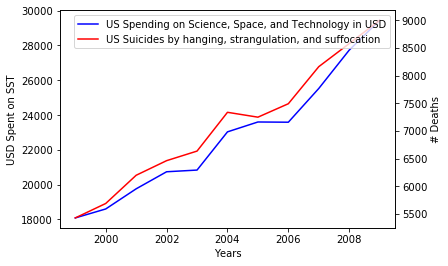

In [2]:
df = pd.read_csv('1-1.csv', comment='#')
plt.figure()
ax1 = plt.gca()
line1, = ax1.plot(df['Year'], df['SST'], c='b')

ax2 = ax1.twinx()
line2, = ax2.plot(df['Year'], df['Suicides'], c='r')
plt.legend((line1, line2), 
           ("US Spending on Science, Space, and Technology in USD",
           "US Suicides by hanging, strangulation, and suffocation"
            ))
ax1.set_ylabel("USD Spent on SST")
ax2.set_ylabel("# Deaths")
ax1.set_xlabel("Years");

## Question 2

Scikit-learn includes many datasets for playing with, one of which is `iris`. This dataset includes measures of many iris flowers, measured in centimeters: sepal length, sepal width, petal length, and petal width. (The sepal is just another part of the flower.) The dataset also includes the species of each flower measured (setosa, versicolor, or virginica).

Often when we start with a new dataset we can to explore it visually to get a feel for it. `Pandas` provides us with a very quick and easy way to compare all the measurements to each other. A similar figure (and similar code) appears on page 20 of the recommended text, IMLP.

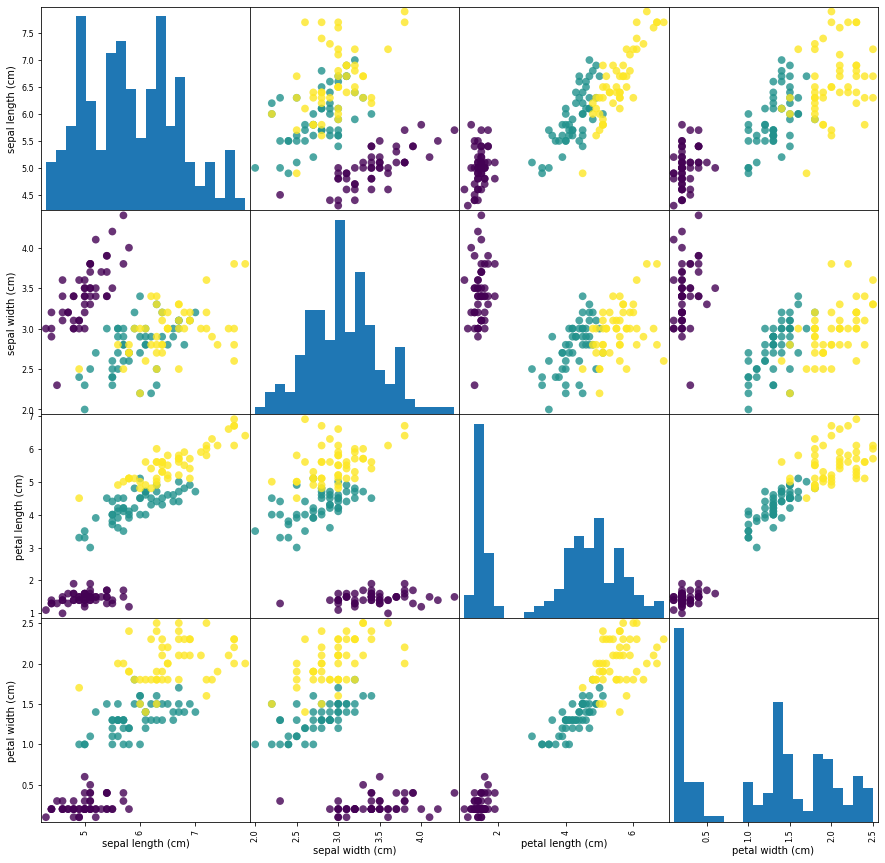

In [3]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
features = iris_dataset.feature_names
data = iris_dataset.data
targets = iris_dataset.target

df = pd.DataFrame(data, columns=features)
pd.plotting.scatter_matrix(df, c=targets, figsize=(15,15),
                          marker='o', hist_kwds={'bins': 20}, s=60,
                          alpha=.8);

Create a pair-plot of the iris dataset similar to this figure **using only numpy and
matplotlib** (you can use scikit-learn to load the data with sklearn.datasets.load_iris, **you are not
allowed to use pandas**). Ensure all axes are labeled. The diagonals need to contain histograms,
the different species need to be distinguished by color or glyph, and there needs to be a
legend for the species.

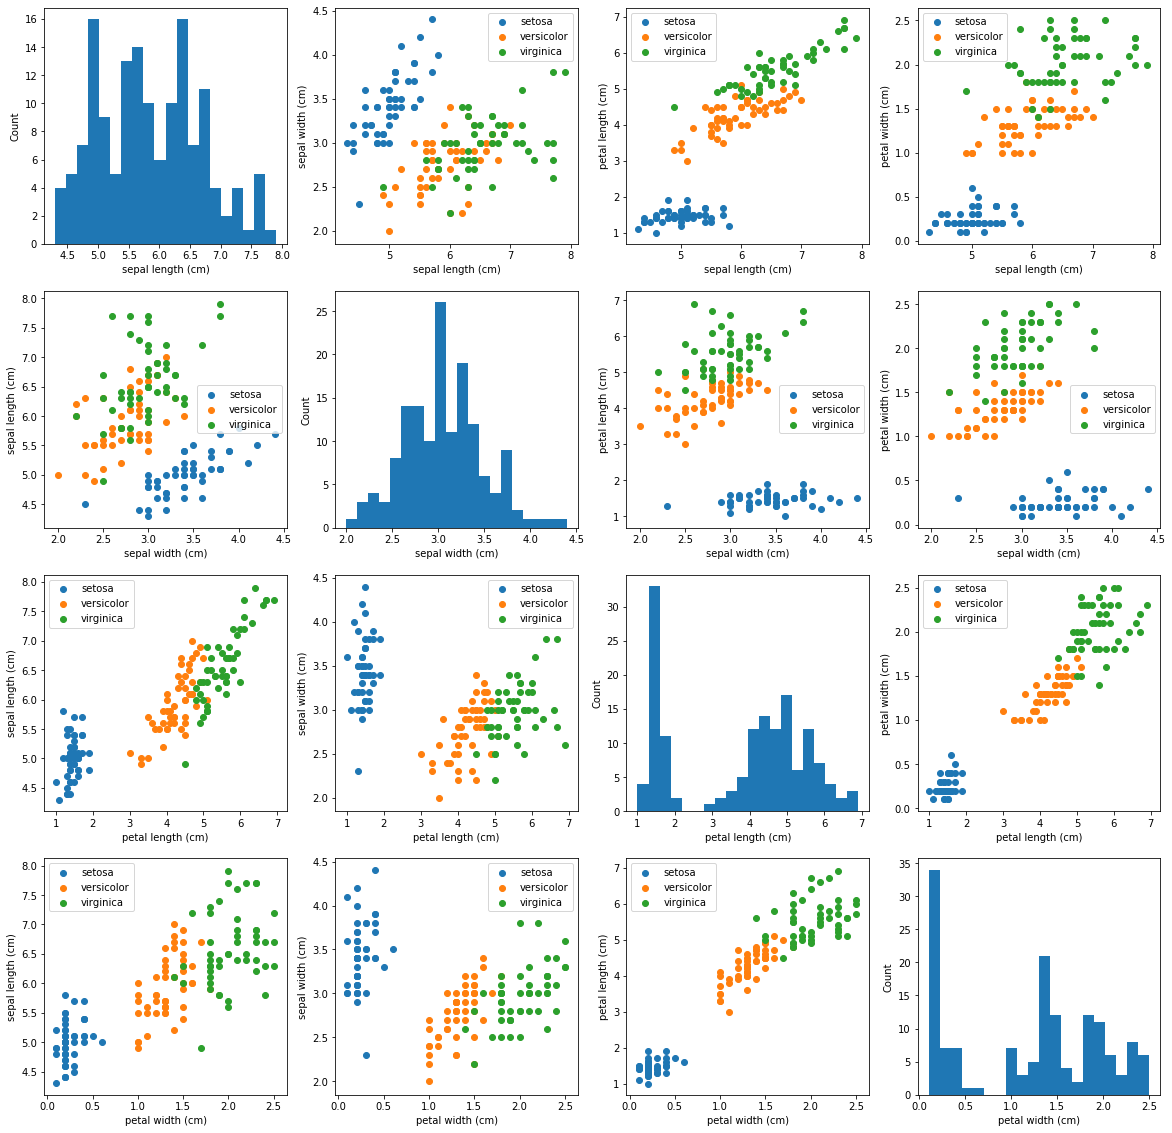

In [4]:
import itertools

fig, ax = plt.subplots(4,4, figsize=(20,20))

for i,j in itertools.product(range(4), range(4)):
    ax[i,j].set_xlabel(features[i])
    if i == j:
        ax[i,j].hist(data[:,i], bins=20) # df['colname'], df.iloc[:, i]
        ax[i,j].set_ylabel("Count")
    else:
        x = data[:,i]
        y = data[:,j]
        
        #plotobj = ax[i,j].scatter(x, y, c=targets, label=targets)
        #ax[i,j].legend(plotobj.legend_elements()[0], iris_dataset.target_names)
        
        for c in range(len(iris_dataset.target_names)):
            ax[i,j].scatter(x[targets==c],y[targets==c])
        ax[i,j].legend(iris_dataset.target_names)
        
        ax[i,j].set_ylabel(features[j])
    

## Question 3

Create an array of scatter plots on the boston housing dataset
(`sklearn.datasets.load_boston`). This dataset contains 13 housing-related features of areas in Boston e.g., crime rate), along with a "target" value of median value of owner-occupied homes (MEDV). After loading the dataset, try `print(boston_dataset.DESCR)` for more info.

For each feature, plot this feature against the target MEDV. Use
alpha to cope with overplotting. Ensure everything is labeled properly and the resulting charts can
easily be read and understood.

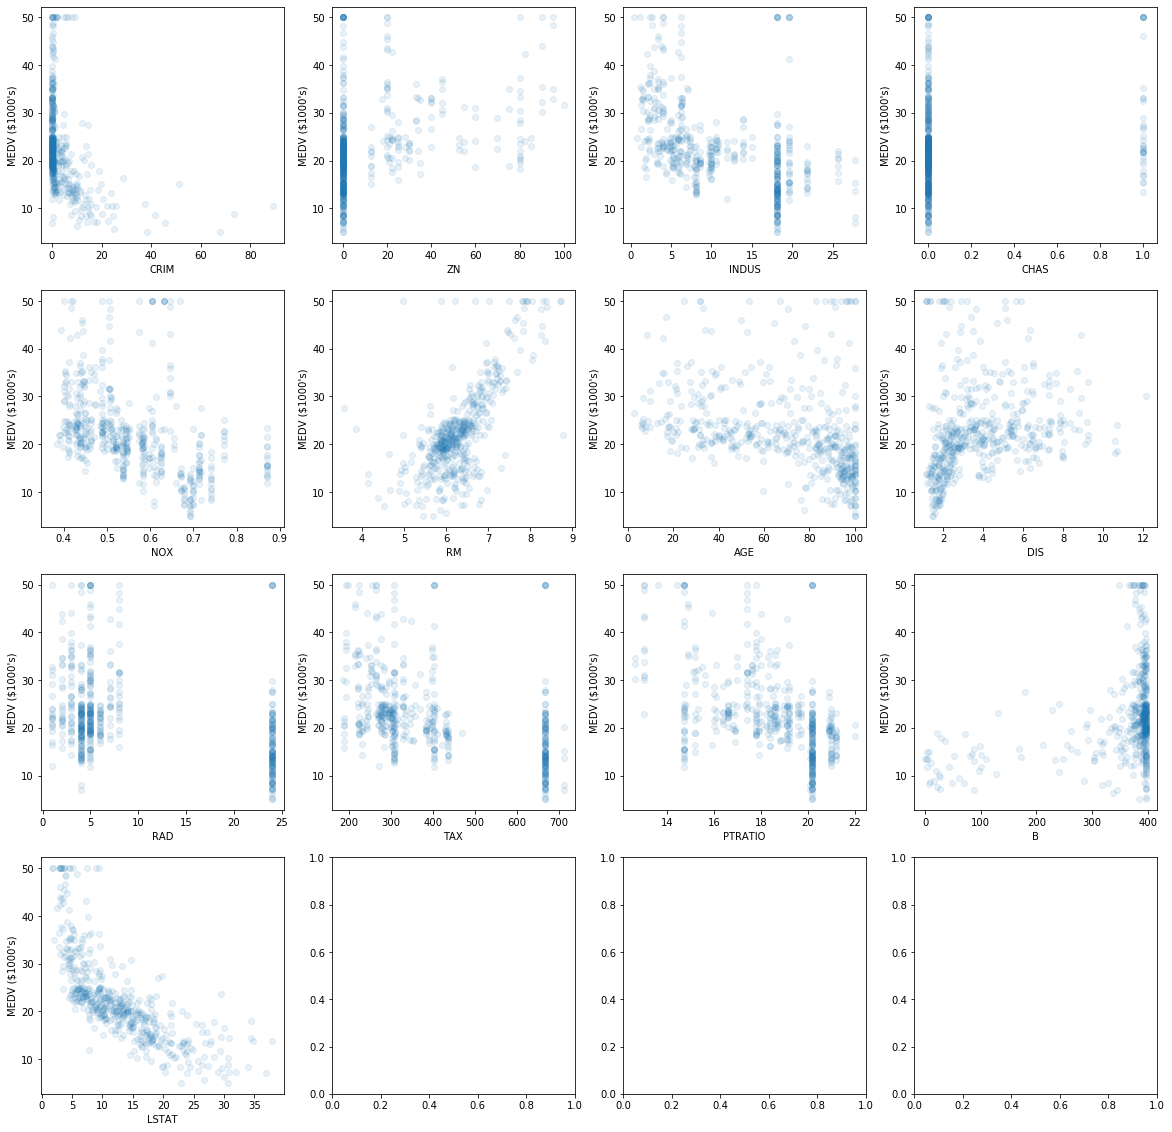

In [5]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

# convenience
data = boston_dataset.data
targets = boston_dataset.target
features = boston_dataset.feature_names

fig, ax = plt.subplots(4,4, figsize=(20,20))
for featnum in range(len(features)):
    x = data[:,featnum]
    i = featnum // 4
    j = featnum % 4
    ax[i,j].scatter(x, targets, alpha=0.1)
    ax[i,j].set_xlabel(features[featnum])
    ax[i,j].set_ylabel('MEDV ($1000\'s)')
    